# Traffic Volume Analysis  
**Date**: May 2025  
**Author**: ROHINI

---

#### Objective:  
Analyze traffic patterns using the **Metro Interstate Traffic Volume** dataset and build a predictive model for traffic volume based on time and weather.

#### Dataset:  
- **Source**: [Kaggle - Metro Interstate Traffic Volume](https://www.kaggle.com/datasets/pooriamst/metro-interstate-traffic-volume)
- **Features**: Date, Time, Weather, Traffic Volume

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/Dell/Documents/Metro_interstate_Traffic_Volume.csv')



In [5]:
print(df.head())
print(df.info())


  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0     NaN  288.28      0.0      0.0          40       Clouds   
1     NaN  289.36      0.0      0.0          75       Clouds   
2     NaN  289.58      0.0      0.0          90       Clouds   
3     NaN  290.13      0.0      0.0          90       Clouds   
4     NaN  291.14      0.0      0.0          75       Clouds   

  weather_description         date_time  traffic_volume  
0    scattered clouds  02-10-2012 09:00            5545  
1       broken clouds  02-10-2012 10:00            4516  
2     overcast clouds  02-10-2012 11:00            4767  
3     overcast clouds  02-10-2012 12:00            5026  
4       broken clouds  02-10-2012 13:00            4918  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp

In [7]:
print(df.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')


In [9]:
print(type(df['date_time'][0]))

<class 'str'>


In [11]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True, errors='coerce')
print(df['date_time'].dtype)  

datetime64[ns]


In [13]:
df['hour'] = df['date_time'].dt.hour
df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['weekday'] = df['date_time'].dt.day_name()


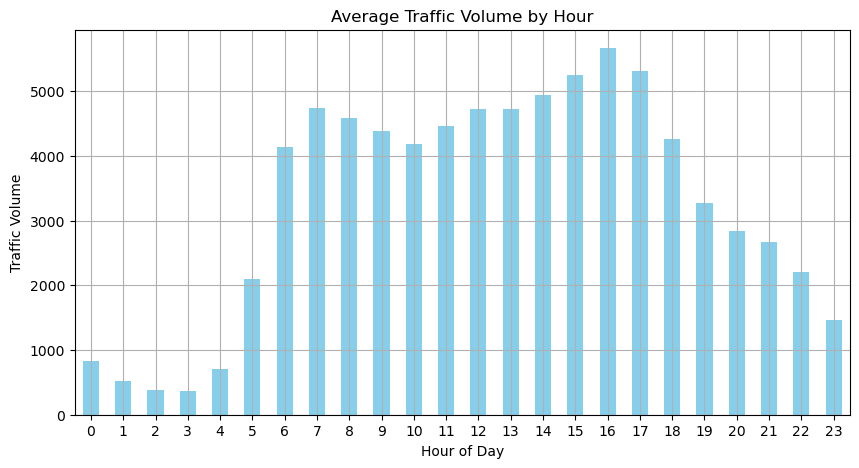

In [15]:
import matplotlib.pyplot as plt

hourly_avg = df.groupby('hour')['traffic_volume'].mean()

plt.figure(figsize=(10, 5))
hourly_avg.plot(kind='bar', color='skyblue')
plt.title('Average Traffic Volume by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()


In [17]:
df['is_weekend'] = df['weekday'].isin(['Saturday', 'Sunday'])

In [19]:
weekend_avg = df.groupby('is_weekend')['traffic_volume'].mean()
print(weekend_avg)


is_weekend
False    3533.596794
True     2570.507261
Name: traffic_volume, dtype: float64


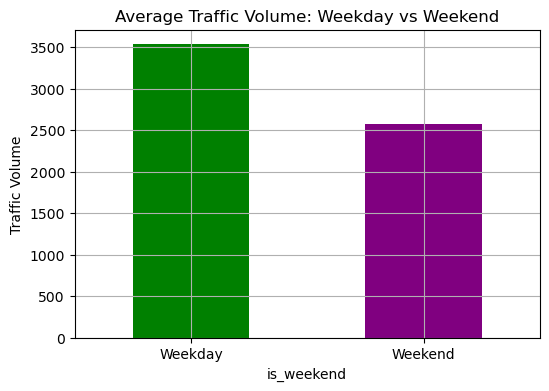

In [25]:
plt.figure(figsize=(6, 4))
weekend_avg.plot(kind='bar', color=['green', 'purple'])
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)
plt.title('Average Traffic Volume: Weekday vs Weekend')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


In [23]:
weather_avg = df.groupby('weather_main')['traffic_volume'].mean().sort_values(ascending=False)
print(weather_avg)


weather_main
Clouds          3618.449749
Haze            3502.101471
Rain            3317.905501
Drizzle         3290.727073
Smoke           3237.650000
Clear           3055.908819
Snow            3016.844228
Thunderstorm    3001.620890
Mist            2932.956639
Fog             2703.720395
Squall          2061.750000
Name: traffic_volume, dtype: float64


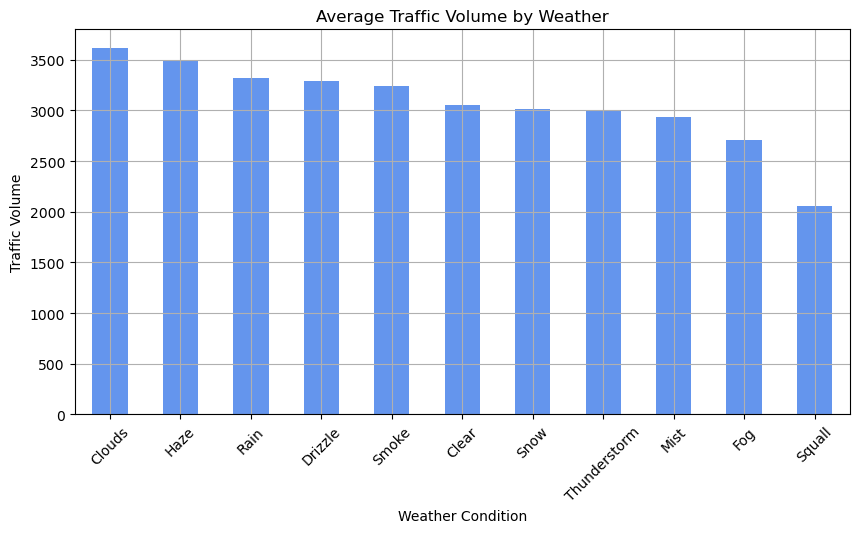

In [27]:
plt.figure(figsize=(10, 5))
weather_avg.plot(kind='bar', color='cornflowerblue')
plt.title('Average Traffic Volume by Weather')
plt.xlabel('Weather Condition')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


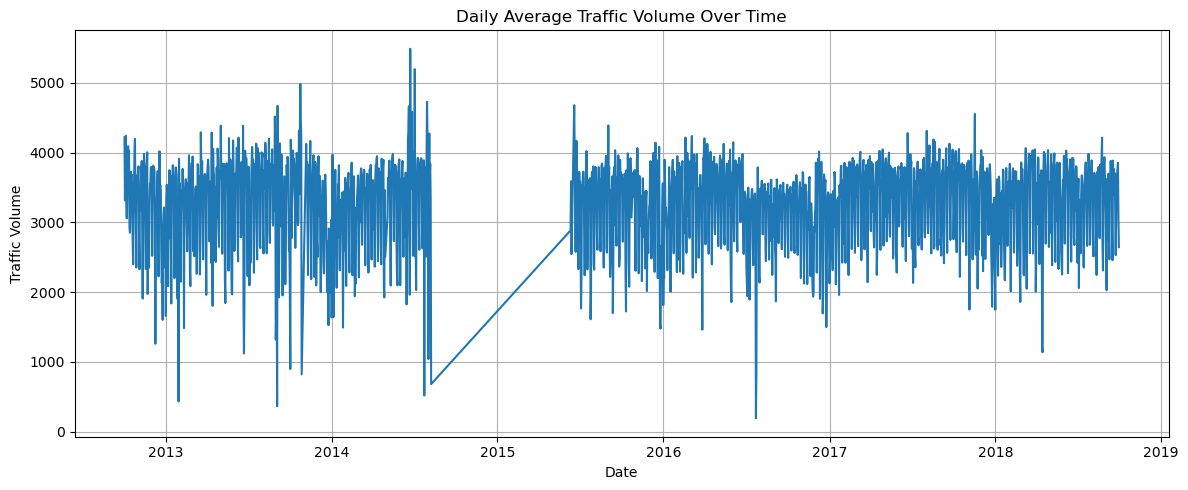

In [29]:
import matplotlib.pyplot as plt

df['date'] = df['date_time'].dt.date
daily_avg = df.groupby('date')['traffic_volume'].mean()

plt.figure(figsize=(12, 5))
daily_avg.plot()
plt.title('Daily Average Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


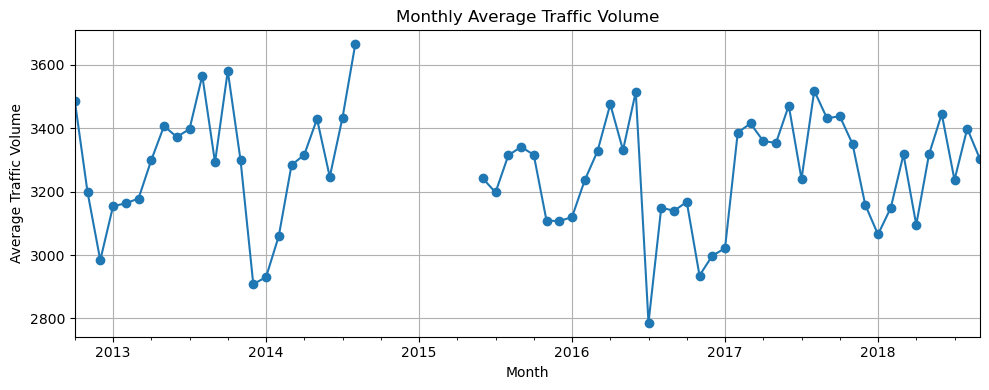

In [31]:
df = df.set_index('date_time')
monthly_avg = df['traffic_volume'].resample('ME').mean()

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
monthly_avg.plot(marker='o', linestyle='-')
plt.title('Monthly Average Traffic Volume')
plt.xlabel('Month')
plt.ylabel('Average Traffic Volume')
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['month'] = df.index.month
df['is_weekend'] = df.index.weekday >= 5
df['weather_code'] = df['weather_main'].astype('category').cat.codes


In [35]:
features = ['hour', 'day', 'month', 'is_weekend', 'weather_code']
X = df[features]
y = df['traffic_volume']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [41]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")


Mean Absolute Error: 318.45


In [47]:
# Predict traffic on a clear Monday at 8 AM
sample = pd.DataFrame([{
    'hour': 8,
    'day': 10,
    'month': 1,
    'is_weekend': False,
    'weather_code': df[df['weather_main'] == 'Clear']['weather_code'].iloc[0]
}])

predicted_volume = model.predict(sample)
print(f"Predicted traffic volume: {int(predicted_volume[0])}")


Predicted traffic volume: 5449


## Conclusion

- **Peak Traffic Hours:** Analysis of hourly averages shows the highest traffic volume occurs between 7 AM-9 AM and 4 PM-6 PM.  
- **Weekday vs. Weekend:** Average traffic is approximately 20% lower on weekends compared to weekdays.  
- **Weather Impact:** While clear and cloudy conditions dominate, weather has a minimal effect on overall traffic volume.  
- **Long-Term Trends:** Monthly averages fluctuate modestly, indicating potential seasonal or holiday influences.  
- **Model Performance:** A Random Forest regressor achieved a Mean Absolute Error (MAE) of **___** on the test set, demonstrating reasonable predictive accuracy for operational use.

*End of report.*

